# **Uma jornada pela análise de dados e pela IA**
**Autor:** [Anderson França](https://www.linkedin.com/in/anderson-m-franca/) | **Contato:** [github.com/andfranca](https://github.com/andfranca/estatistica-e-aprendizado-de-maquinas-ptbr)

<a href="https://creativecommons.org/licenses/by/4.0/deed.en"><img align="left" width="80" src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc.png"/></a>


# **Aplicação Regressão Logística**

___

A classificação é uma das principais tarefas em machine learning supervisionado, cujo objetivo é prever uma classe ou categoria para uma observação baseada em suas características. Em vez de prever um valor contínuo, como na regressão, a classificação lida com a previsão de um valor discreto, ou seja, um rótulo ou categoria que corresponde a uma classe específica.

Alguns exemplos de problemas de classificação são:

- Decidir se um contrato é fraude ou não;
- Atribuir um diagnóstico de um paciente com base nas características observadas do paciente (idade, pressão arterial, presença ou ausência de certos sintomas, etc.)
- Detectar notícias falsas

## **Classificação Binária e Multiclasse**

- **Classificação Binária:** É o tipo mais simples de classificação, onde há apenas duas possíveis categorias ou rótulos. Exemplo: prever se um paciente será readmitido no hospital dentro de um determinado período após a alta, com as classes sendo "readmissão" e "não readmissão".


- **Classificação Multiclasse:** O modelo precisa escolher entre três ou mais classes. Exemplo:  prever diferentes tipos de doenças respiratórias com base em características clínicas dos pacientes, como frequência respiratória, nível de oxigenação, presença de febre e padrões identificados em exames de imagem.


<div>
<img src="https://drive.google.com/uc?export=view&id=1ylLY8pyfO_lCjWyrUZPmJNzthjh7UPIL" width="700" align="center"/>
    
</div>

## **Principais Algoritmos - Scikit Learning**

O Scikit-Learn oferece inúmeros algoritmos de classificação. Entre eles:

- **Regressão Logística:** Um dos algoritmos mais simples e comuns, que será aprofundado na sequência.
- **Árvore de Decisão:** Algoritmo que constrói uma árvore para tomar decisões com base em regras de divisão.
- **k-Nearest Neighbors:** Classifica um ponto com base nas classes de seus vizinhos mais próximos.
- **Support Vector Machines:** Algoritmo que tenta encontrar uma fronteira ótima entre as classes.

Para mais detalhes sobre todos os algoritmos disponíveis e como utilizar, basta acessar a documentação da biblioteca em: [scikit-learn](https://scikit-learn.org/stable/supervised_learning.html)

## **Banco de Dados Saída de Funcionários**

O conjunto de dados Atrito de Empregados é uma base para avaliar a evasão de colaboradores. Ele reúne informações detalhadas sobre o perfil dos empregados, como dados demográficos, características do trabalho e circunstâncias pessoais,  permitindo explorar os fatores que influenciam o desligamento.

O conjunto contém 74.498 registros, já dividido em treinamento e teste, para facilitar o desenvolvimento e a validação de modelos preditivos.

Cada linha representa um empregado, com um ID exclusivo e um conjunto de variáveis que ajudam a identificar padrões de evasão.


A base de dados pode ser obtida em: [Employee Attrition Classification Dataset](https://www.kaggle.com/datasets/stealthtechnologies/employee-attrition-dataset)

In [66]:
# Importando bibliotecas
import pandas as pd

In [67]:
#Definir base de treinamento e teste
df = pd.read_csv('https://raw.githubusercontent.com/andfranca/proadi-sus-ciencia-de-dados-ia/refs/heads/main/bases/base_atrito.csv',low_memory=False)

In [68]:
#Inspecionar estrutura do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   74498 non-null  int64 
 1   ID                           74498 non-null  int64 
 2   Idade                        74498 non-null  int64 
 3   Genero                       74498 non-null  object
 4   Anos na Empresa              74498 non-null  int64 
 5   Area de Atuacao              74498 non-null  object
 6   Salario                      74498 non-null  int64 
 7   Equilibrio vidatrabalho      74498 non-null  object
 8   Satisfacao Trabalho          74498 non-null  object
 9   Taxa de desempenho           74498 non-null  object
 10  Numero de promocoes          74498 non-null  int64 
 11  Hora Extra                   74498 non-null  object
 12  Distancia casa trabalho      74498 non-null  int64 
 13  Nivel de Educacao            74

# **Pré-Processamento (Preparação da base de dados)**
São etapas realizadas antes do treinamento do modelo, que visam preparar os dados de forma que eles sejam adequados e eficazes para a construção de modelos de machine learning.

Existem diversas técnicas para input de dados, normalização e codificação de variáveis. No momento, vamos utilizar a codificação das variáveis utilizando o Label Encoder do Sklearn.

In [69]:
from sklearn.preprocessing import LabelEncoder

### Selecionar variaveis categóricas
variaveis_categoricas = df.select_dtypes(include=['object']).columns
variaveis_categoricas

# Criar um dicionário para armazenar os LabelEncoders
label_encoders = {}

# Aplicar LabelEncoder a cada coluna categórica
for i in variaveis_categoricas:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])
    label_encoders[i] = le

# Modelagem
### Particionamento da base

O particionamento dos dados é muito importante para o desenvolvimento de modelos de aprendizado de máquina robustos, garantindo que sejam confiáveis, generalizem bem e tenham resultados precisos e replicáveis.

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
# Definir variáveis que vão explicar o modelo
x = df[['Idade',
        'Genero',
        'Anos na Empresa',
        'Area de Atuacao',
        'Salario',
        'Equilibrio vidatrabalho',
        'Satisfacao Trabalho',
        'Taxa de desempenho',
        'Numero de promocoes',
        'Hora Extra',
        'Distancia casa trabalho',
        'Nivel de Educacao',
        'Status Civil',
        'Numero de Dependentes',
        'Nivel no Trabalho',
        'Tamanho da empresa',
        'Tempo de empresa meses',
        'Trabalho remoto',
        'Oportunidade de Lideranca',
        'Inovacao',
        'Reputacao da Empresa',
        'Reconhecimento Funcionarios']]

#Definir a variável objetivo
y = df['Deixou a empresa']

In [72]:
#Definir bases de treino e teste, com 80% para treinamento do modelo
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.20,
                                                    random_state = 42)

## **Regressão Logística**

A regressão logística é um modelo estatístico muito utilizado para prever a probabilidade de ocorrência de um evento binário, com base em variáveis independentes. É muito útil quando precisamos prever a probabilidade de uma observação pertencer a uma classe específica. Por exemplo:

- Fraude / Não Fraude
- Compra / Não compra
- Ocorre / Não ocorre
- 0 / 1

#### **Principais características:**
- A variável depende (resposta) é binária, ou seja, assume apenas dois valores possíveis `0 ou 1`
- Ao contrário da regressão linear, a logística modela a probabilidade de a variável dependente pertencer a uma determinada categoria. A saída é uma probabilidade estimada entre 0 e 1.
- A relação entre as variáveis independentes e a probabilidade de ocorrência é modelada pela função logística.

$$
P(Y=1 \mid X) = \frac{1}{1 + e^{-\beta_0 - \beta_1 X_1 - \dots - \beta_p X_p}}
$$

>> Onde:
- P(Y = 1 | X) é a probabilidade condicional de Y ser 1 dado X
- e é a base do logaritmo natural
- β0,β1,…,βp são os coeficientes do modelo estimados


- Com base na probabilidade estimada, é possível definir um limiar (geralmente 0.5) para classificar as observações em uma das duas classes. Por exemplo, quando a probabilidade de fraude for maior do que 0.5, a observação vai ser caracterizada como fraude. Caso contrário, será marcado como não fraude.

### **Regressão Logística - Scikit-Learn**

O Scikit-learn é uma biblioteca de machine learning muito popular em Python, que oferece uma variedade de algoritmos para classificação, regressão, clustering e processamento de dados. Ela é amplamente utilizada devido à sua simplicidade e eficiência, fornecendo ferramentas prontas para o desenvolvimento de modelos, avaliação de desempenho e manipulação de dados.

Para mais informações sobre a biblioteca, acesse: [scikit-learn.org](scikit-learn.org)

In [73]:
#Carregar a biblioteca de regressão logística
from sklearn.linear_model import LogisticRegression

In [74]:
#Ajustar o modelor de regressão logística
modelo_log = LogisticRegression(random_state = 0)
modelo_log.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [75]:
#Previsão do modelo em uma base nova
y_pred_log = modelo_log.predict(X_test)

# **Métricas de Classificação**

Métricas de classificação são indicadores usados para avaliar o desempenho de modelos em tarefas de classificação, onde o objetivo é prever rótulos discretos (categorias ou classes).

Essas métricas ajudam a entender quão bem o modelo está prevendo as classes corretas e são essenciais para comparar modelos e otimizar seus resultados.

Vamos analisar as métricas mais utilizadas:

- Acurácia
- Precision
- Recall

### **Acurácia (ACC)**
Indica a performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente

$$
\text{Acurácia} = \frac{\text{Previsões corretas}}{\text{Total de previsões}}
$$

A acurácia é um bom indicador geral de como o modelo performou. Porém, pode haver situações em que ela é enganosa.

In [76]:
#Calculando a acurácia com o Sklearn
acc = metrics.accuracy_score(y_test, y_pred_log)

print(f"A taxa total de acerto do modelo é {acc :.2%}")

A taxa total de acerto do modelo é 70.49%


## **Precision (PPV) e Recall**


#### **Precision**

Dentre **todas** as classificações de classe Positivo que o modelo fez, quantas estão corretas

A precisão pode ser usada em uma situação em que os **Falsos Positivos** são considerados mais prejudiciais que os Falsos Negativos.


#### **Recall**

Sensibilidade ou Taxa de Verdadeiros Positivos

O recall é o número de pessoas que o modelo identificou corretamente como tendo diabetes dividido pelo número total de pessoas que realmente têm a doença.

O recall pode ser usada em uma situação em que os **Falsos Negativos** são considerados mais prejudiciais que os Falsos Positivos.



<div>
<img src="https://drive.google.com/uc?export=view&id=1oUJCdnIpf4IqJvKA9IR3Re86TQK1p5S8" width="600" align="center"/>
    
</div>




Mais informações sobre as métricas do sklearn, acesse: [Metrics Sklearn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

### **Relatório de Classificação**
O `classification report` fornece uma visão geral das métricas principais como precisão, recall, F1-score e suporte para cada classe presente no conjunto de dados.

In [77]:
print(metrics.classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      7804
           1       0.70      0.67      0.68      7096

    accuracy                           0.70     14900
   macro avg       0.70      0.70      0.70     14900
weighted avg       0.70      0.70      0.70     14900



#### Quando usar cada uma?

- **Acurácia:** Útil quando as classes estão balanceadas e você quer um indicador geral.
- **Precisão:** Importante quando você quer minimizar os falsos positivos (como em detecção de fraudes).
- **Recall:** Essencial quando os falsos negativos são mais críticos (como em diagnósticos de doenças).
- **F1-Score:** Bom para cenários com dados desbalanceados, quando você quer equilibrar precisão e recall.


# **Aplicações de Análise de Cluster**

A segmentação por algoritmo, é associada ao conceito de clusterização, e utiliza modelos não supervisionados para agrupar dados em grupos com base em padrões complexos que muitas vezes não são identificados por análises tradicionais.

A clusterização permite dividir grandes bases de dados em grupos homogêneos, com base em similaridades ou correlações entre variáveis, permitindo que cada grupo sejam mais próximos entre si do que de itens de outros grupos.


<div>
<img src="https://drive.google.com/uc?export=view&id=1T8h5h6EU9LNKZpw4m79ZzwvYwUi6cRrI" width="600" align="center"/>
    
</div>

Os algoritmos de clustering permitem extrair valor de grandes quantidades de dados, sejam eles estruturados ou não estruturados. Esses algoritmos permitem separar os dados com base em suas características ou propriedades e agrupá-los em diferentes clusters, dependendo de suas similaridades.

Embora existam mais de 100 algoritmos de clustering conhecidos, apenas alguns são amplamente utilizados devido à sua eficiência e facilidade de aplicação. Vamos abordar dois dos métodos mais utilizados:

<div>
<img src="https://drive.google.com/uc?export=view&id=1KRfcbZOQ4MBqbl2nbrSF5kDzcjeq-2zO" width="600" align="center"/>
    
</div>


### **Medidas de Dissimilaridade**
Agora vamos trabalhar com um exemplo próximo do cotidiano. Considere um gerente de vendas que deseja agrupar cinco representantes comerciais em três grupos, utilizando duas variáveis: número de clientes atendidos por mês e volume médio de vendas em reais.

A tabela abaixo apresenta os valores dessas variáveis para cada representante e será utilizada como base para a análise.

In [78]:
#Criar a tabela de representante de vendas

import pandas as pd

dados = {
    'Representante':[1,2,3,4,5],
    'Clientes Atendidos': [2,3,12,8,12],
    'Vendas': [2,4,12,16,2]
}

df = pd.DataFrame(dados)
df

,Representante,Clientes Atendidos,Vendas
0,1,2,2
1,2,3,4
2,3,12,12
3,4,8,16
4,5,12,2


##**Calcular as distâncias**

In [79]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

#Selecionar as colunas Clientes Atendidos e Vendas
X = df[['Clientes Atendidos','Vendas']].values

#Calcular a Distância
matriz_dist = pdist(X, metric='euclidean')
metodo_ligacao = linkage(matriz_dist, method='complete')

### **Visualizar o Dendrograma**

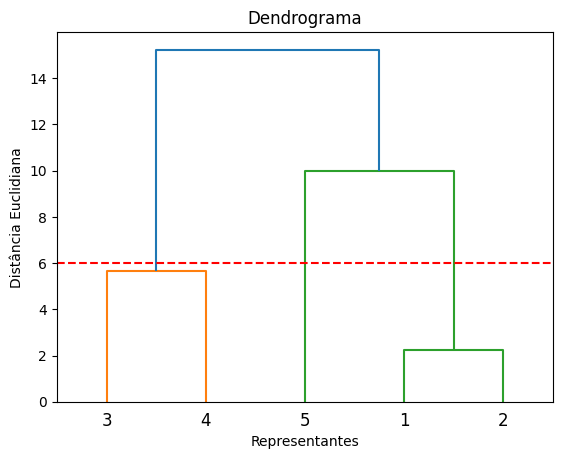

In [80]:
dendrogram(metodo_ligacao, labels=df['Representante'].values)
corte = 6
plt.axhline(y=corte, color='r', linestyle='--')
plt.title('Dendrograma')
plt.xlabel('Representantes')
plt.ylabel('Distância Euclidiana')
plt.show()

### Atribuir os grupos

In [81]:
grupos = fcluster(metodo_ligacao, corte, criterion='distance')

df['Grupos'] = grupos
df

,Representante,Clientes Atendidos,Vendas,Grupos
0,1,2,2,2
1,2,3,4,2
2,3,12,12,1
3,4,8,16,1
4,5,12,2,3


### **Aplicação 1 - Tabela Nutricional**

In [82]:
import pandas as pd
tabela_nutricional = pd.read_csv('https://raw.githubusercontent.com/andfranca/jornada-de-dados/refs/heads/main/tabela%20nutricional%20(2).csv', sep=',', decimal=",")
tabela_nutricional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lanche              25 non-null     object 
 1   Valor Energetico    25 non-null     int64  
 2   Carboidratos        25 non-null     int64  
 3   Proteinas           25 non-null     int64  
 4   Gorduras Totais     25 non-null     float64
 5   Gorduras Saturadas  25 non-null     float64
 6   Gorduras Trans      25 non-null     float64
 7   Colesterol          25 non-null     int64  
 8   Fibra Alimentar     25 non-null     float64
 9   Sodio               25 non-null     int64  
 10  Calcio              25 non-null     int64  
 11  Ferro               25 non-null     float64
dtypes: float64(5), int64(6), object(1)
memory usage: 2.5+ KB


In [83]:
tabela_nutricional

,Lanche,Valor Energetico,Carboidratos,Proteinas,Gorduras Totais,Gorduras Saturadas,Gorduras Trans,Colesterol,Fibra Alimentar,Sodio,Calcio,Ferro
0,Big Mac,504,41,25,27.0,12.0,0.5,54,3.5,960,162,6.50
1,Big Tasty,843,45,41,55.0,24.0,1.7,104,5.1,1511,381,8.20
2,Quarterao,558,36,31,32.0,16.0,1.3,86,3.6,1216,275,10.00
3,Mcnifico Bacon,625,38,34,37.0,16.0,1.3,95,3.9,1255,209,11.00
4,Cheddar McMelt,507,33,29,29.0,14.0,1.2,81,2.9,819,199,10.00
5,McFish,373,38,18,16.0,5.8,0.4,43,2.2,773,168,3.80
6,McChicken,454,40,18,25.0,6.0,0.3,49,3.1,1068,67,4.00
7,McChicken Jr,337,33,13,17.0,4.5,0.4,11,3.3,633,58,3.10
8,Chicken Classic Crispy,490,52,24,20.0,4.4,0.2,33,6.7,1361,38,2.50
9,Chicken Classic Grill,425,44,34,12.0,2.0,0.2,68,5.5,1072,44,2.60


### **Calcular distâncias**

In [84]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

#retirar coluna com o nome dos alimentos
X = tabela_nutricional.drop(columns=['Lanche'], axis=1).values

#Calcular a distância
matriz_dist = pdist(X, metric='euclidean')
metodo_ligacao = linkage(matriz_dist, method='average')

### **Exibir o dendrograma**

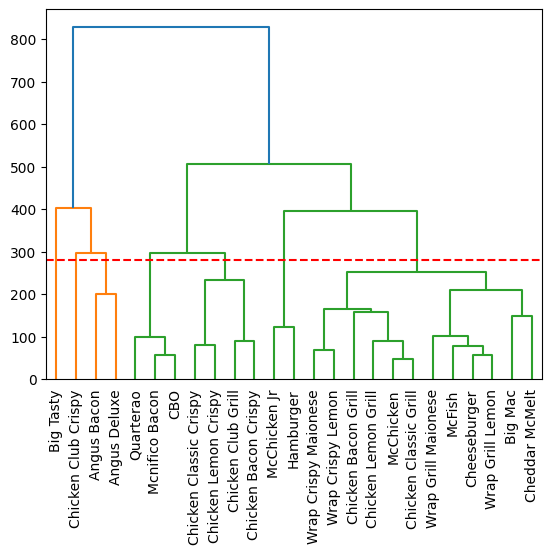

In [85]:
dendrogram(metodo_ligacao, labels=lanche['Lanche'].values)
corte = 280
plt.axhline(y=corte, color='r', linestyle='--')
plt.xticks(rotation=90)
plt.show()

### **Criar os grupos**

In [86]:
grupos = fcluster(metodo_ligacao, corte, criterion='distance')

tabela_nutricional['Grupos'] = grupos
tabela_nutricional

,Lanche,Valor Energetico,Carboidratos,Proteinas,Gorduras Totais,Gorduras Saturadas,Gorduras Trans,Colesterol,Fibra Alimentar,Sodio,Calcio,Ferro,Grupos
0,Big Mac,504,41,25,27.0,12.0,0.5,54,3.5,960,162,6.50,7
1,Big Tasty,843,45,41,55.0,24.0,1.7,104,5.1,1511,381,8.20,3
2,Quarterao,558,36,31,32.0,16.0,1.3,86,3.6,1216,275,10.00,4
3,Mcnifico Bacon,625,38,34,37.0,16.0,1.3,95,3.9,1255,209,11.00,4
4,Cheddar McMelt,507,33,29,29.0,14.0,1.2,81,2.9,819,199,10.00,7
5,McFish,373,38,18,16.0,5.8,0.4,43,2.2,773,168,3.80,7
6,McChicken,454,40,18,25.0,6.0,0.3,49,3.1,1068,67,4.00,7
7,McChicken Jr,337,33,13,17.0,4.5,0.4,11,3.3,633,58,3.10,6
8,Chicken Classic Crispy,490,52,24,20.0,4.4,0.2,33,6.7,1361,38,2.50,5
9,Chicken Classic Grill,425,44,34,12.0,2.0,0.2,68,5.5,1072,44,2.60,7


### **Aplicação 2 - Separar Municípios de acordo com dados demográficos com dados do IBGE (2024)**

In [87]:
# Carregar base de dados do IBGE
municipios = pd.read_csv('https://raw.githubusercontent.com/andfranca/jornada-de-dados/refs/heads/main/municipios.csv', decimal = ',')
municipios.head()

,Municipio,Codigo,Gentilico,Prefeito_2021,Área Territorial - km² [2022],População residente - pessoas [2022],Densidade demográfica - hab/km² [2022],Escolarização <span>6 a 14 anos</span> - % [2010],IDHM <span>Índice de desenvolvimento humano municipal</span> [2010],Mortalidade infantil - óbitos por mil nascidos vivos [2022],Receitas realizadas - R$ (×1000) [2022],Despesas empenhadas - R$ (×1000) [2023],PIB per capita - R$ [2021],Estado,Latitude,Longitude
0,Florínia,3516101,florinense ou florineano,PAULO EDUARDO PINTO,225.886,3851,17.05,96.6,0.713,-,4.386376e+07,3.869256e+07,65354.84,São Paulo,-22.881,-50.695
1,Itaóca,3522158,itaoquense,ANTONIO CARLOS TRANNIN,183.015,3422,18.70,98.8,0.680,"45,45",1.361518e+06,3.295028e+07,16009.98,São Paulo,-24.617,-48.839
2,Moji Mirim,3530805,mogi-miriano,PAULO DE OLIVEIRA E SILVA,497.708,92558,185.97,97.4,0.784,"5,5",6.687226e+08,6.589003e+08,67095.62,São Paulo,-22.450,-46.988
3,Santa Lucia,3546900,santa-luciense,LUIZ ANTONIO NOLI,153.860,7149,46.46,98.6,0.737,-,4.252545e+07,3.953784e+07,14751.70,São Paulo,-21.670,-48.057
4,Santa Rosa do Viterbo,3547601,santa-rosense,OMAR NAGIB MOUSSA,288.576,23411,81.13,97.9,0.770,"18,69",1.287644e+08,1.195181e+08,30914.10,São Paulo,-21.503,-47.366


In [99]:
X = municipios.drop(columns=['Municipio',
                             'Estado',
                             'Latitude',
                             'Longitude',
                             'Prefeito_2021',
                             'Codigo',
                             'Gentilico',
                             'Mortalidade infantil - óbitos por mil nascidos vivos [2022]'
                             ], axis=1).values


#Padronizar os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

### **Calcular Distâncias**

In [100]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

matriz_dist = pdist(X, metric='euclidean')
metodo_ligacao = linkage(matriz_dist, method='complete')

### **Exibir Dendrograma**

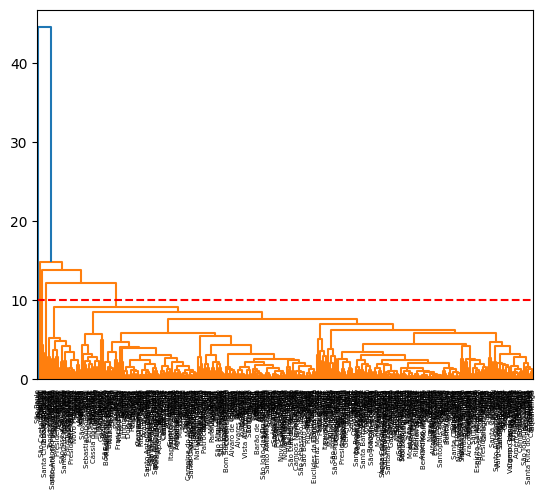

In [102]:
dendrogram(metodo_ligacao, labels=municipios['Municipio'].values)
corte = 10
plt.axhline(y=corte, color='r', linestyle='--')
plt.xticks(rotation=90)
plt.show()

### **Método K-means**

In [91]:
from sklearn.cluster import KMeans

In [103]:
#Definir o número de cluster
n_cluster = 10

#Criar os grupos considerando os critérios escolhidos
municipios['Grupo K-Means'] = kmeans.fit_predict(X).astype(object)

In [118]:
#Visualizar Tabela
municipios

,Municipio,Codigo,Gentilico,Prefeito_2021,Área Territorial - km² [2022],População residente - pessoas [2022],Densidade demográfica - hab/km² [2022],Escolarização <span>6 a 14 anos</span> - % [2010],IDHM <span>Índice de desenvolvimento humano municipal</span> [2010],Mortalidade infantil - óbitos por mil nascidos vivos [2022],Receitas realizadas - R$ (×1000) [2022],Despesas empenhadas - R$ (×1000) [2023],PIB per capita - R$ [2021],Estado,Latitude,Longitude,Grupo K-Means
0,Florínia,3516101,florinense ou florineano,PAULO EDUARDO PINTO,225.886,3851,17.05,96.6,0.713,-,4.386376e+07,3.869256e+07,65354.84,São Paulo,-22.881,-50.695,5
1,Itaóca,3522158,itaoquense,ANTONIO CARLOS TRANNIN,183.015,3422,18.70,98.8,0.680,"45,45",1.361518e+06,3.295028e+07,16009.98,São Paulo,-24.617,-48.839,2
2,Moji Mirim,3530805,mogi-miriano,PAULO DE OLIVEIRA E SILVA,497.708,92558,185.97,97.4,0.784,"5,5",6.687226e+08,6.589003e+08,67095.62,São Paulo,-22.450,-46.988,0
3,Santa Lucia,3546900,santa-luciense,LUIZ ANTONIO NOLI,153.860,7149,46.46,98.6,0.737,-,4.252545e+07,3.953784e+07,14751.70,São Paulo,-21.670,-48.057,2
4,Santa Rosa do Viterbo,3547601,santa-rosense,OMAR NAGIB MOUSSA,288.576,23411,81.13,97.9,0.770,"18,69",1.287644e+08,1.195181e+08,30914.10,São Paulo,-21.503,-47.366,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,Mesópolis,3529658,mesopolense,JOSE CARLOS DA SILVA,148.636,1952,13.13,100.0,0.724,-,3.104519e+07,2.935416e+07,42887.61,São Paulo,-19.957,-50.615,2
641,Mira Estrela,3530003,mira-estrelense,PRISCILLA FERNANDA COBACHO DO PRADO,216.825,3126,14.42,97.2,0.743,-,4.078490e+07,3.529637e+07,22515.72,São Paulo,-19.951,-50.124,5
642,Indiaporã,3520707,indiaporãense,ADERITO CAMARGO FERREIRA DA SILVA,279.606,4035,14.43,98.5,0.751,-,4.020362e+07,3.842205e+07,28664.34,São Paulo,-19.947,-50.263,2
643,Ouroeste,3534757,ouroestense,ALEX GARCIA SAKATA,288.648,10294,35.66,99.7,0.770,"10,87",1.050077e+08,1.020149e+08,51226.69,São Paulo,-19.922,-50.402,2


# Visualizar os dados em gráfico

Através do K-Means e do t-SNE, vamos visualizar como os municípios se agrupam de acordo com características como população, renda, educação e outros fatores.
Cada ponto no gráfico representa um município, e as cores indicam a qual grupo ele pertence.

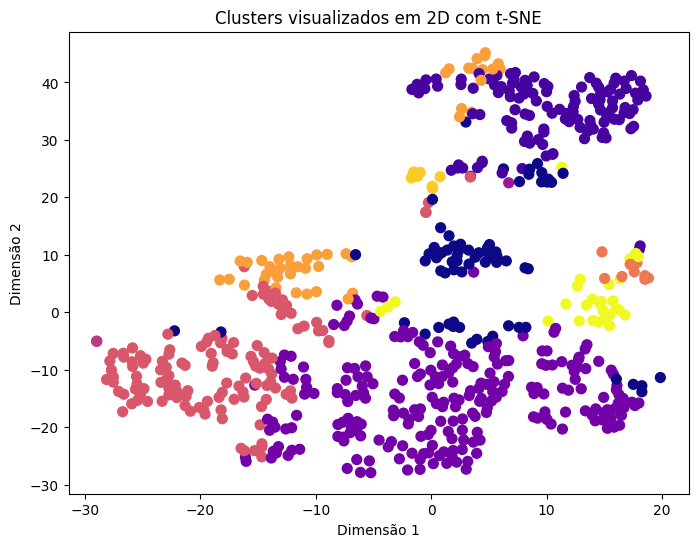

In [121]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_, cmap='plasma', s=50)
plt.title('Clusters visualizados em 2D com t-SNE')
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.show()